# IMPORT LIBRARY

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout, MaxPooling1D, Conv1D, Bidirectional, LSTM, Flatten, GlobalMaxPooling1D
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv1D
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, LeakyReLU
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.optimizers import Adam

# PACKAGES

In [3]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\Republic Of
[nltk_data]     Gamers\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Republic Of
[nltk_data]     Gamers\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Republic Of
[nltk_data]     Gamers\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# IMPORT DATA

In [4]:
dftest = pd.read_csv("C:\\Users\\Republic Of Gamers\\OneDrive - Asia Pacific University\\YEAR 3 SEM 2\\Optimisation And Deep Learning\\Assignment Files\\archive (1)\\test.txt", delimiter=';', header=None, names=['sentence','label'])
dftrain = pd.read_csv("C:\\Users\\Republic Of Gamers\\OneDrive - Asia Pacific University\\YEAR 3 SEM 2\\Optimisation And Deep Learning\\Assignment Files\\archive (1)\\train.txt", delimiter=';', header=None, names=['sentence','label'])
dfvalidation = pd.read_csv("C:\\Users\\Republic Of Gamers\\OneDrive - Asia Pacific University\\YEAR 3 SEM 2\\Optimisation And Deep Learning\\Assignment Files\\archive (1)\\val.txt", delimiter=';', header=None, names=['sentence','label'])

## Train Data

In [5]:
dftrain

,sentence,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


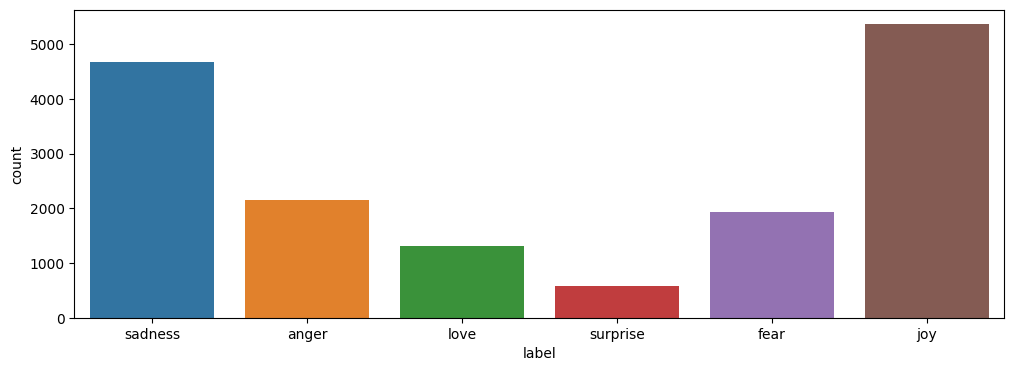

In [6]:
plt.figure(figsize=(12,4))
sns.countplot(x='label', data=dftrain);

## Test Data

In [7]:
dftest

,sentence,label
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness
...,...,...
1995,i just keep feeling like someone is being unki...,anger
1996,im feeling a little cranky negative after this...,anger
1997,i feel that i am useful to my people and that ...,joy
1998,im feeling more comfortable with derby i feel ...,joy


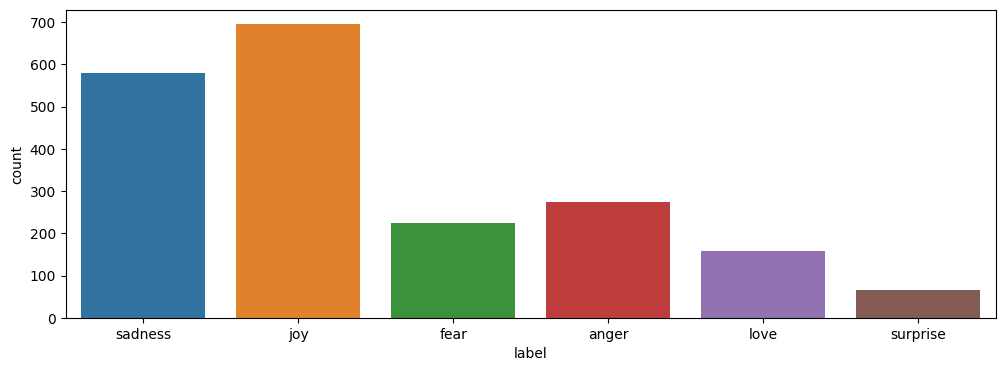

In [8]:
plt.figure(figsize=(12,4))
sns.countplot(x='label', data=dftest);

## Validation Data

In [9]:
dfvalidation

,sentence,label
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy
...,...,...
1995,im having ssa examination tomorrow in the morn...,sadness
1996,i constantly worry about their fight against n...,joy
1997,i feel its important to share this info for th...,joy
1998,i truly feel that if you are passionate enough...,joy


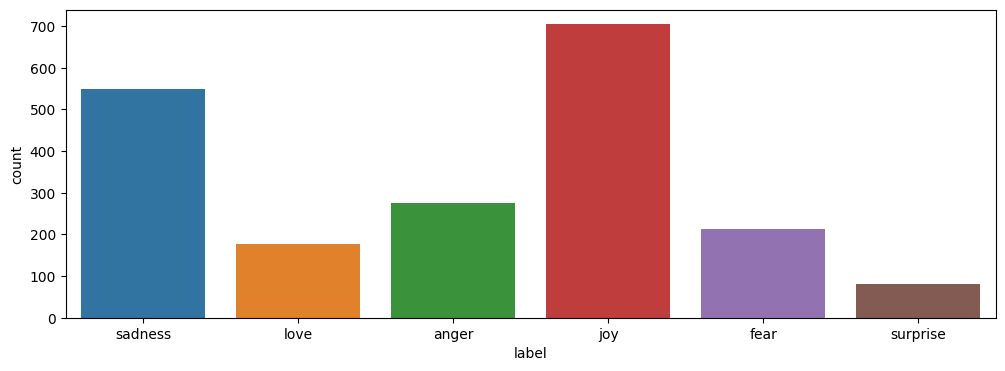

In [10]:
plt.figure(figsize=(12,4))
sns.countplot(x='label', data=dfvalidation);

# PRE-PROCESSING

In [11]:
encoder = LabelEncoder()
dftrain['encodedLabel'] = encoder.fit_transform(dftrain['label'])
dftest['encodedLabel'] = encoder.fit_transform(dftest['label'])
dfvalidation['encodedLabel'] = encoder.fit_transform(dfvalidation['label'])

In [12]:
stemmer = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()
stopwordsMod = set(stopwords.words('english')) - {"not"}

def preprocess(text):
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    tokens = re.findall(r'\b\w+\b|[!?]+|\.{3}', text)
    tokens = [word for word in tokens if word not in stopwordsMod]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    tokens = [stemmer.stem(word) for word in tokens]
    return " ".join(tokens)

In [13]:
preprocessedTextTrain = dftrain['sentence'].apply(preprocess)
preprocessedTextTest = dftest['sentence'].apply(preprocess)
preprocessedTextVal = dfvalidation['sentence'].apply(preprocess)

In [14]:
processedTrainDf = pd.DataFrame({'preprocessedSentence': preprocessedTextTrain})
processedTrainDf= pd.concat([dftrain, processedTrainDf ], axis=1)

processedTestDf = pd.DataFrame({'preprocessedSentence': preprocessedTextTest})
processedTestDf= pd.concat([dftest, processedTestDf ], axis=1)

processedValDf = pd.DataFrame({'preprocessedSentence': preprocessedTextVal})
processedValDf= pd.concat([dfvalidation, processedValDf ], axis=1)

In [15]:
processedTrainDf.head()

,sentence,label,encodedLabel,preprocessedSentence
0,i didnt feel humiliated,sadness,4,didnt feel humili
1,i can go from feeling so hopeless to so damned...,sadness,4,go feel hopeless damn hope around someon care ...
2,im grabbing a minute to post i feel greedy wrong,anger,0,im grab minut post feel greedi wrong
3,i am ever feeling nostalgic about the fireplac...,love,3,ever feel nostalg fireplac know still properti
4,i am feeling grouchy,anger,0,feel grouchi


In [16]:
processedTestDf.head()

,sentence,label,encodedLabel,preprocessedSentence
0,im feeling rather rotten so im not very ambiti...,sadness,4,im feel rather rotten im not ambiti right
1,im updating my blog because i feel shitty,sadness,4,im updat blog feel shitti
2,i never make her separate from me because i do...,sadness,4,never make separ ever want feel like asham
3,i left with my bouquet of red and yellow tulip...,joy,2,left bouquet red yellow tulip arm feel slight ...
4,i was feeling a little vain when i did this one,sadness,4,feel littl vain one


In [17]:
processedValDf.head()

,sentence,label,encodedLabel,preprocessedSentence
0,im feeling quite sad and sorry for myself but ...,sadness,4,im feel quit sad sorri ill snap soon
1,i feel like i am still looking at a blank canv...,sadness,4,feel like still look blank canva blank piec paper
2,i feel like a faithful servant,love,3,feel like faith servant
3,i am just feeling cranky and blue,anger,0,feel cranki blue
4,i can have for a treat or if i am feeling festive,joy,2,treat feel festiv


In [18]:
X_train = processedTrainDf['preprocessedSentence']
y_train = processedTrainDf['encodedLabel']

X_test= processedTestDf['preprocessedSentence']
y_test = processedTestDf['encodedLabel']

X_val = processedValDf['preprocessedSentence']
y_val = processedValDf['encodedLabel']

In [19]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [20]:
len(tokenizer.word_index)

10216

In [21]:
trainSeq = tokenizer.texts_to_sequences(X_train)
valSeq = tokenizer.texts_to_sequences(X_val)
testSeq = tokenizer.texts_to_sequences(X_test)

In [22]:
max_length = max(len(seq) for seq in trainSeq)
paddedSeqTrain = pad_sequences(trainSeq, maxlen=max_length, padding='post')
paddedSeqVal = pad_sequences(valSeq, maxlen=max_length, padding='post')
paddedSeqTest = pad_sequences(testSeq, maxlen=max_length, padding='post')

In [34]:
y_trainResampledOneHot = to_categorical(y_train, num_classes=6)
y_valOneHot = to_categorical(y_val, num_classes=6)
y_testOneHot = to_categorical(y_test, num_classes=6)

# Default GRU

In [29]:
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=max_length))
model.add(Conv1D(64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=3))
model.add(Bidirectional(GRU(128, return_sequences=True, recurrent_dropout=0.2)))
model.add(Dropout(0.5))
model.add(Bidirectional(GRU(256, recurrent_dropout=0.2)))
model.add(Dropout(0.5))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(
    paddedSeqTrain, 
    y_trainResampledOneHot,
    epochs=10, 
    batch_size=50, 
    validation_data=(paddedSeqVal, y_valOneHot),
    callbacks=[early_stopping]
)


Epoch 1/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.4056 - loss: 1.4384 - val_accuracy: 0.8140 - val_loss: 0.5392
Epoch 2/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.8618 - loss: 0.3923 - val_accuracy: 0.8745 - val_loss: 0.3635
Epoch 3/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9269 - loss: 0.2130 - val_accuracy: 0.8785 - val_loss: 0.3707
Epoch 4/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9510 - loss: 0.1420 - val_accuracy: 0.8710 - val_loss: 0.4038


In [30]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (50, 35, 64)           │       653,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (50, 35, 64)           │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (50, 11, 64)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_8 (Bidirectional) │ (50, 11, 256)          │       148,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (50, 11, 256)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_9 (Bidirectional) │ (50, 512)              │       789,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (50, 512)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (50, 512)              │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (50, 512)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (50, 6)                │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,611,412 (21.41 MB)

 Trainable params: 1,870,470 (7.14 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,740,942 (14.27 MB)

In [33]:
from sklearn.metrics import classification_report

class_names = ['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise']

y_val_pred = model.predict(paddedSeqVal)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_valOneHot, axis=1)

report = classification_report(y_val_true_classes, y_val_pred_classes, target_names=class_names)
print(report)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
              precision    recall  f1-score   support

       Anger       0.81      0.91      0.85       275
        Fear       0.86      0.77      0.81       212
         Joy       0.91      0.92      0.91       704
        Love       0.76      0.73      0.75       178
     Sadness       0.93      0.92      0.92       550
    Surprise       0.72      0.68      0.70        81

    accuracy                           0.87      2000
   macro avg       0.83      0.82      0.83      2000
weighted avg       0.87      0.87      0.87      2000



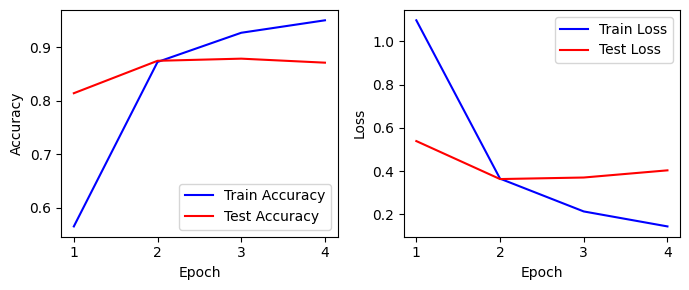

In [37]:
acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(1,len(acc2)+1)
 
# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
 
axes[0].plot(epochs, acc2,'b',label='Train Accuracy')
axes[0].plot(epochs, val_acc,'r',label='Test Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
 
axes[1].plot(epochs, loss2,'b',label='Train Loss')
axes[1].plot(epochs, val_loss,'r',label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
 
# Adjusting layout for better spacing
plt.tight_layout()
 
# Display the figure
plt.show()

# GRU Tuning

In [38]:

class MyHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=max_length))
        model.add(Conv1D(32, kernel_size=3, padding='same', activation='relu'))
        model.add(MaxPooling1D(pool_size=4))
        
        GRU1 = 128
        GRU2 = 256

        dropout_rate = hp.Float('dropout_rate', min_value=0.3, max_value=0.5, step=0.1)

        batch_size = hp.Int('batch_size', min_value=32, max_value=128, step=32)
        
        model.add(Bidirectional(GRU(GRU1, return_sequences=True, recurrent_dropout=0.2)))
        model.add(Dropout(dropout_rate))
        model.add(Bidirectional(GRU(GRU2, recurrent_dropout=0.3)))
        model.add(Dropout(dropout_rate))
        
        model.add(Dense(512, activation="relu"))
        model.add(Dropout(dropout_rate))
        
        model.add(Dense(6, activation='softmax'))
        
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        
        return model


tuner = Hyperband(
    MyHyperModel(),
    objective='val_accuracy',
    max_epochs=50, 
    hyperband_iterations=2,
    directory='my_dir9',
    project_name='my_project'
)


tuner.search(
    paddedSeqTrain,
    y_trainResampledOneHot,
    validation_data=(paddedSeqVal, y_valOneHot),
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)],
    epochs=10,
    batch_size=None  
)


best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

best_model = MyHyperModel().build(best_hp)

history_best = best_model.fit(
    paddedSeqTrain,
    y_trainResampledOneHot,
    epochs=10,  
    batch_size=best_hp.get('batch_size'), 
    validation_data=(paddedSeqVal, y_valOneHot),
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)]
)

print("Best Hyperparameters:")
print(f"Batch size: {best_hp.get('batch_size')}")
print(f"Dropout Rate: {best_hp.get('dropout_rate')}")

Reloading Tuner from my_dir9\my_project\tuner0.json
Epoch 1/10


C:\Users\Republic Of Gamers\AppData\Local\Temp\ipykernel_24952\4046683679.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperModel
c:\Users\Republic Of Gamers\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


167/167 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.3749 - loss: 1.4966 - val_accuracy: 0.7215 - val_loss: 0.8142
Epoch 2/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.7903 - loss: 0.5206 - val_accuracy: 0.8360 - val_loss: 0.4797
Epoch 3/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9200 - loss: 0.2299 - val_accuracy: 0.8585 - val_loss: 0.4315
Epoch 4/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.9485 - loss: 0.1560 - val_accuracy: 0.8545 - val_loss: 0.4236
Epoch 5/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.9638 - loss: 0.1090 - val_accuracy: 0.8725 - val_loss: 0.4096
Epoch 6/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.9761 - loss: 0.0711 - val_accuracy: 0.8645 - val_loss: 0.4727
Epoch 7/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.9738 - loss: 0.0746 - val_accuracy: 0.8625 - val_loss: 0.4828
Epoch 8/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9809 - loss: 0.0564 - val_accuracy: 0.87

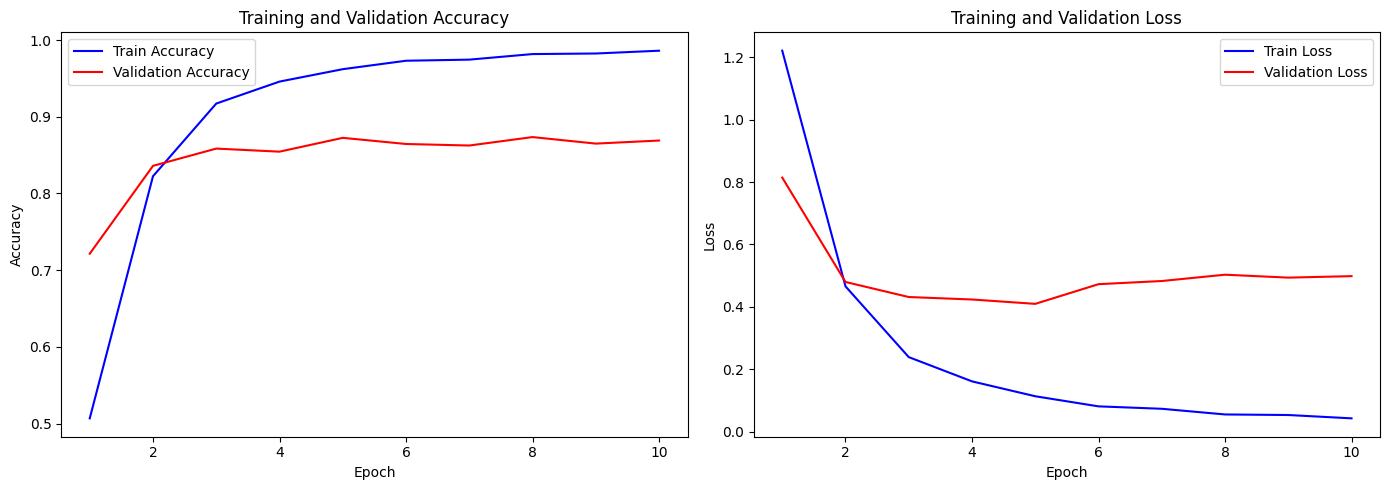

In [39]:
# Plotting the training history
acc2 = history_best.history['accuracy']
val_acc = history_best.history['val_accuracy']
loss2 = history_best.history['loss']
val_loss = history_best.history['val_loss']

epochs = range(1, len(acc2) + 1)

# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

axes[0].plot(epochs, acc2, 'b', label='Train Accuracy')
axes[0].plot(epochs, val_acc, 'r', label='Validation Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Training and Validation Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss2, 'b', label='Train Loss')
axes[1].plot(epochs, val_loss, 'r', label='Validation Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].legend()

# Adjusting layout for better spacing
plt.tight_layout()

# Display the figure
plt.show()

In [40]:
class_names = ['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise']

y_val_pred = best_model.predict(paddedSeqVal)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_valOneHot, axis=1)

report = classification_report(y_val_true_classes, y_val_pred_classes, target_names=class_names)
print(report)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
              precision    recall  f1-score   support

       Anger       0.89      0.84      0.86       275
        Fear       0.80      0.84      0.82       212
         Joy       0.88      0.92      0.90       704
        Love       0.78      0.78      0.78       178
     Sadness       0.92      0.89      0.91       550
    Surprise       0.84      0.78      0.81        81

    accuracy                           0.87      2000
   macro avg       0.85      0.84      0.85      2000
weighted avg       0.87      0.87      0.87      2000



# LSTM Default

In [42]:
from tensorflow.keras.layers import LayerNormalization

modelLSTM = Sequential()
modelLSTM.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32, input_length=max_length))
modelLSTM.add(Conv1D(32, kernel_size=2, padding='same', activation='relu'))
modelLSTM.add(MaxPooling1D(pool_size=1))
modelLSTM.add(Bidirectional(LSTM(64, return_sequences=True)))
modelLSTM.add(Dropout(0.3))
modelLSTM.add(LayerNormalization())
modelLSTM.add(Bidirectional(LSTM(128, return_sequences=True)))
modelLSTM.add(Dropout(0.3))
modelLSTM.add(LayerNormalization())
modelLSTM.add(Bidirectional(LSTM(256)))
modelLSTM.add(Dropout(0.5))
modelLSTM.add(Dense(6, activation='softmax'))  


modelLSTM.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = modelLSTM.fit(
    paddedSeqTrain, 
    y_trainResampledOneHot, 
    epochs=10, 
    batch_size=50, 
    validation_data=(paddedSeqVal, y_valOneHot),
    callbacks=[early_stopping]
)

Epoch 1/10


c:\Users\Republic Of Gamers\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


320/320 ━━━━━━━━━━━━━━━━━━━━ 46s 123ms/step - accuracy: 0.3676 - loss: 1.5632 - val_accuracy: 0.8130 - val_loss: 0.5513
Epoch 2/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 39s 122ms/step - accuracy: 0.8765 - loss: 0.3553 - val_accuracy: 0.8780 - val_loss: 0.3329
Epoch 3/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 39s 122ms/step - accuracy: 0.9335 - loss: 0.1867 - val_accuracy: 0.8830 - val_loss: 0.3322
Epoch 4/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 40s 126ms/step - accuracy: 0.9528 - loss: 0.1372 - val_accuracy: 0.8930 - val_loss: 0.3391
Epoch 5/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 41s 127ms/step - accuracy: 0.9582 - loss: 0.1097 - val_accuracy: 0.8790 - val_loss: 0.3697
Epoch 6/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 41s 128ms/step - accuracy: 0.9663 - loss: 0.0874 - val_accuracy: 0.8840 - val_loss: 0.3981


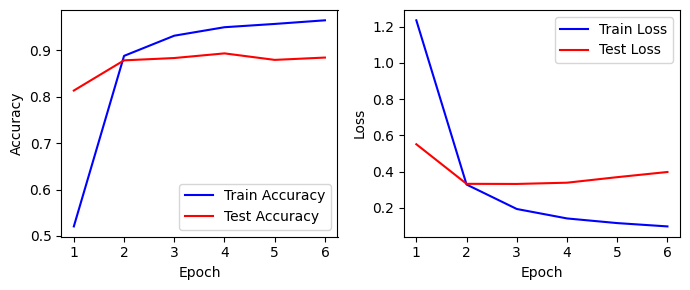

In [43]:
acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(1,len(acc2)+1)
 
# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
 
axes[0].plot(epochs, acc2,'b',label='Train Accuracy')
axes[0].plot(epochs, val_acc,'r',label='Test Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
 
axes[1].plot(epochs, loss2,'b',label='Train Loss')
axes[1].plot(epochs, val_loss,'r',label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
 
# Adjusting layout for better spacing
plt.tight_layout()
 
# Display the figure
plt.show()

In [44]:
class_names = ['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise']

y_val_pred = modelLSTM.predict(paddedSeqVal)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_valOneHot, axis=1)

report = classification_report(y_val_true_classes, y_val_pred_classes, target_names=class_names)
print(report)

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step
              precision    recall  f1-score   support

       Anger       0.90      0.87      0.88       275
        Fear       0.83      0.83      0.83       212
         Joy       0.95      0.88      0.91       704
        Love       0.78      0.76      0.77       178
     Sadness       0.88      0.97      0.92       550
    Surprise       0.71      0.77      0.74        81

    accuracy                           0.88      2000
   macro avg       0.84      0.85      0.84      2000
weighted avg       0.89      0.88      0.88      2000



# LSTM Tuning

In [45]:
class MyHyperModel(HyperModel):
    def build(self, hp):
        modelLSTMhyp = Sequential()
        modelLSTMhyp.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32, input_length=max_length))
        modelLSTMhyp.add(Conv1D(64, kernel_size=3, padding='same', activation='relu'))
        modelLSTMhyp.add(MaxPooling1D(pool_size=2))
        
        LSTM1 = 128
        LSTM2 = 256
        LSTM3 = 256

        dropout_rate = hp.Float('dropout_rate', min_value=0.3, max_value=0.5, step=0.1)
        
        batch_size = hp.Int('batch_size', min_value=32, max_value=128, step=32)

        modelLSTMhyp.add(Bidirectional(LSTM(LSTM1, return_sequences=True)))
        modelLSTMhyp.add(Dropout(dropout_rate))
        modelLSTMhyp.add(LayerNormalization())
        modelLSTMhyp.add(Bidirectional(LSTM(LSTM2, return_sequences=True)))
        modelLSTMhyp.add(Dropout(dropout_rate))
        modelLSTMhyp.add(LayerNormalization())
        modelLSTMhyp.add(Bidirectional(LSTM(LSTM3)))
        modelLSTMhyp.add(Dropout(dropout_rate))
        modelLSTMhyp.add(Dense(6, activation='softmax'))

        modelLSTMhyp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

        return modelLSTMhyp


tuner = Hyperband(
    MyHyperModel(),
    objective='val_accuracy',
    max_epochs=50,  
    hyperband_iterations=2,
    directory='my_dir4',
    project_name='my_project'
)


tuner.search(
    paddedSeqTrain,
    y_trainResampledOneHot,
    validation_data=(paddedSeqVal, y_valOneHot),
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)],
    epochs=10,
    batch_size=None  
)


best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]


best_model = MyHyperModel().build(best_hp)


history_best = best_model.fit(
    paddedSeqTrain,
    y_trainResampledOneHot,
    epochs=10,  
    batch_size=best_hp.get('batch_size'), 
    validation_data=(paddedSeqVal, y_valOneHot),
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)]
)

print("Best Hyperparameters:")
print(f"Batch size: {best_hp.get('batch_size')}")
print(f"Dropout Rate: {best_hp.get('dropout_rate')}")


Reloading Tuner from my_dir4\my_project\tuner0.json
Epoch 1/10


c:\Users\Republic Of Gamers\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ━━━━━━━━━━━━━━━━━━━━ 39s 130ms/step - accuracy: 0.3147 - loss: 1.6814 - val_accuracy: 0.6090 - val_loss: 1.1096
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 32s 128ms/step - accuracy: 0.6683 - loss: 0.8865 - val_accuracy: 0.8180 - val_loss: 0.5226
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 31s 125ms/step - accuracy: 0.8668 - loss: 0.3912 - val_accuracy: 0.8730 - val_loss: 0.3681
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 32s 127ms/step - accuracy: 0.9342 - loss: 0.1905 - val_accuracy: 0.8935 - val_loss: 0.3205
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 32s 128ms/step - accuracy: 0.9581 - loss: 0.1188 - val_accuracy: 0.8810 - val_loss: 0.3548
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 32s 126ms/step - accuracy: 0.9648 - loss: 0.0984 - val_accuracy: 0.8880 - val_loss: 0.4076
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 31s 126ms/step - accuracy: 0.9752 - loss: 0.0729 - val_accuracy: 0.8865 - val_loss: 0.4160
Best Hyperparameters:
Batch size: 64
Dropout Rate: 0.4


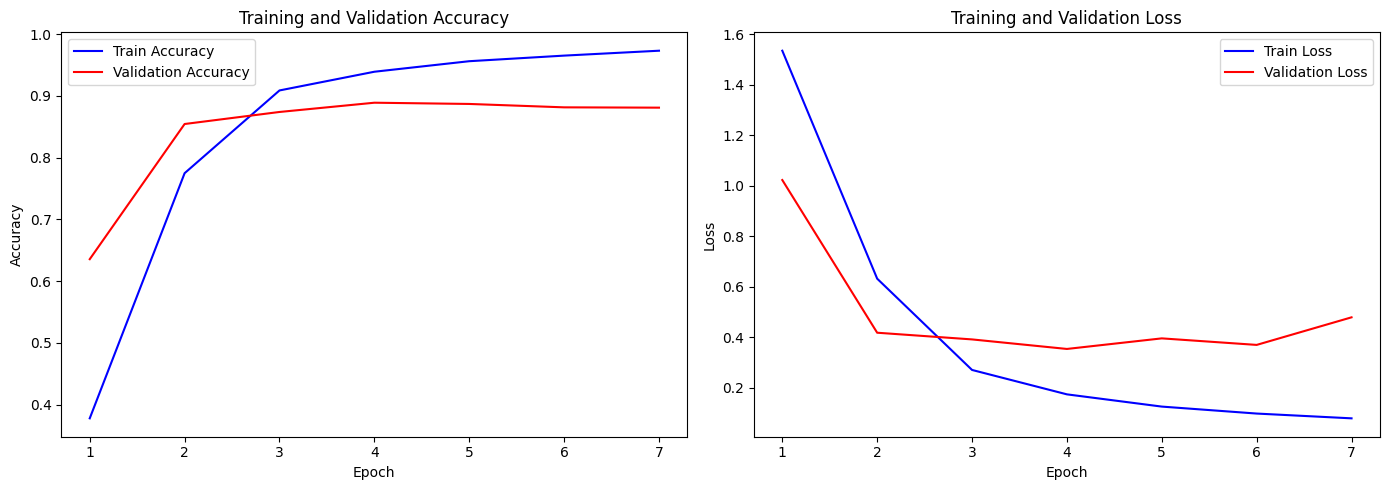

In [59]:
acc2 = history_best.history['accuracy']
val_acc = history_best.history['val_accuracy']
loss2 = history_best.history['loss']
val_loss = history_best.history['val_loss']

epochs = range(1, len(acc2) + 1)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

axes[0].plot(epochs, acc2, 'b', label='Train Accuracy')
axes[0].plot(epochs, val_acc, 'r', label='Validation Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Training and Validation Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss2, 'b', label='Train Loss')
axes[1].plot(epochs, val_loss, 'r', label='Validation Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].legend()

plt.tight_layout()

plt.show()

In [46]:
class_names = ['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise']

y_val_pred = best_model.predict(paddedSeqVal)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_valOneHot, axis=1)

report = classification_report(y_val_true_classes, y_val_pred_classes, target_names=class_names)
print(report)

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step
              precision    recall  f1-score   support

       Anger       0.91      0.92      0.92       275
        Fear       0.87      0.85      0.86       212
         Joy       0.94      0.89      0.92       704
        Love       0.77      0.81      0.79       178
     Sadness       0.89      0.95      0.92       550
    Surprise       0.78      0.73      0.75        81

    accuracy                           0.89      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.89      0.89      0.89      2000



# Default DNN

In [ ]:
def build_dnn_model(vocab_size, embedding_dim, input_length, num_classes):
    model = Sequential()
    
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length))
    model.add(Conv1D(32, kernel_size=3, padding='same', activation='relu'))
    
    model.add(Flatten())
    
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5)) 
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))  
    
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100  
input_length = max_length
num_classes = 6  

model = build_dnn_model(vocab_size, embedding_dim, input_length, num_classes)
model.summary()

history = model.fit(
    paddedSeqTrain, 
    y_trainResampledOneHot, 
    epochs=10, 
    validation_data=(paddedSeqVal, y_valOneHot), 
    batch_size=32
)

In [ ]:
acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(1,len(acc2)+1)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
 
axes[0].plot(epochs, acc2,'b',label='Train Accuracy')
axes[0].plot(epochs, val_acc,'r',label='Test Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
 
axes[1].plot(epochs, loss2,'b',label='Train Loss')
axes[1].plot(epochs, val_loss,'r',label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
 
plt.tight_layout()
 
plt.show()

In [ ]:
class_names = ['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise']

y_val_pred = model.predict(paddedSeqVal)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_valOneHot, axis=1)

report = classification_report(y_val_true_classes, y_val_pred_classes, target_names=class_names)
print(report)


# DNN Tuning

In [ ]:
def build_dnn_model(hp):
    model = Sequential()
    

    model.add(Embedding(
        input_dim=len(tokenizer.word_index) + 1, 
        output_dim=hp.Int('embedding_dim', min_value=50, max_value=200, step=50),
        input_length=max_length
    ))
    model.add(Conv1D(32, kernel_size=3, padding='same', activation='relu'))

    model.add(Flatten())
    
    for i in range(hp.Int('num_layers', 1, 4)):  
        model.add(Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
            kernel_regularizer=l2(hp.Float(f'l2_reg_{i}', min_value=0.01, max_value=0.1, step=0.01)),
            activation=None  
        ))
        model.add(BatchNormalization())
        model.add(LeakyReLU(alpha=hp.Float(f'leaky_relu_alpha_{i}', min_value=0.01, max_value=0.3, step=0.01)))
        model.add(Dropout(hp.Float(f'dropout_{i}', min_value=0.2, max_value=0.5, step=0.1)))
        model.add(Dense(512, activation='relu'))
        model.add(Dropout(0.5))  
        model.add(Dense(256, activation='relu'))
        model.add(Dropout(0.5))  
    
    model.add(Dense(6, activation='softmax'))
    
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [ ]:
tuner = kt.RandomSearch(
    build_dnn_model,
    objective='val_accuracy',
    max_trials=10,  
    executions_per_trial=1,  
    directory='my_dnn_tuning_dir',
    project_name='dnn_hyperparameter_tuning'
)

tuner.search(
    paddedSeqTrain, 
    y_trainResampledOneHot, 
    epochs=10, 
    validation_data=(paddedSeqVal, y_valOneHot), 
    batch_size=32
)

best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

best_model = build_dnn_model(best_hyperparameters)

history = best_model.fit(
    paddedSeqTrain, 
    y_trainResampledOneHot, 
    epochs=10, 
    validation_data=(paddedSeqVal, y_valOneHot), 
    batch_size=32
)

In [ ]:
acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(1,len(acc2)+1)
 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
 
axes[0].plot(epochs, acc2,'b',label='Train Accuracy')
axes[0].plot(epochs, val_acc,'r',label='Test Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
 
axes[1].plot(epochs, loss2,'b',label='Train Loss')
axes[1].plot(epochs, val_loss,'r',label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
 
plt.tight_layout()
 
plt.show()

In [ ]:
class_names = ['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise']

y_val_pred = best_model.predict(paddedSeqVal)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_valOneHot, axis=1)

report = classification_report(y_val_true_classes, y_val_pred_classes, target_names=class_names)
print(report)


# CNN Default

In [ ]:
vocab_size = len(tokenizer.word_index) + 1 
embedding_dim = 100  
max_length = max(len(seq) for seq in trainSeq)

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax') 
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

history = model.fit(paddedSeqTrain, y_trainResampledOneHot, 
                    epochs=10, 
                    validation_data=(paddedSeqVal, y_valOneHot), 
                    batch_size=32)

In [ ]:
acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(1,len(acc2)+1)
 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
 
axes[0].plot(epochs, acc2,'b',label='Train Accuracy')
axes[0].plot(epochs, val_acc,'r',label='Test Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
 
axes[1].plot(epochs, loss2,'b',label='Train Loss')
axes[1].plot(epochs, val_loss,'r',label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
 
plt.show()

In [ ]:
class_names = ['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise']

y_val_pred = model.predict(paddedSeqVal)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_valOneHot, axis=1)

report = classification_report(y_val_true_classes, y_val_pred_classes, target_names=class_names)
print(report)


# CNN Tuning

In [ ]:
def build_model(hp):
    model = tf.keras.Sequential()
    
    model.add(tf.keras.layers.Embedding(input_dim=vocab_size, 
                                        output_dim=hp.Int('embedding_dim', min_value=100, max_value=300, step=50), 
                                        input_length=max_length))
    
    model.add(tf.keras.layers.Conv1D(filters=hp.Int('filters_1', min_value=64, max_value=256, step=32), 
                                     kernel_size=hp.Choice('kernel_size_1', values=[3, 5, 7]), 
                                     kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(tf.keras.layers.MaxPooling1D(pool_size=hp.Choice('pool_size', values=[2, 3])))
    
    model.add(tf.keras.layers.Conv1D(filters=hp.Int('filters_2', min_value=64, max_value=256, step=32), 
                                     kernel_size=hp.Choice('kernel_size_2', values=[3, 5, 7]), 
                                     kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    
    if hp.Boolean('additional_conv'):
        model.add(tf.keras.layers.Conv1D(filters=hp.Int('filters_3', min_value=64, max_value=256, step=32), 
                                         kernel_size=hp.Choice('kernel_size_3', values=[3, 5, 7]), 
                                         kernel_regularizer=l2(0.01)))
        model.add(BatchNormalization())
        model.add(LeakyReLU())
    
    model.add(tf.keras.layers.GlobalMaxPooling1D())
    
    model.add(tf.keras.layers.Dense(units=hp.Int('dense_units', min_value=64, max_value=256, step=64), 
                                    kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    
    model.add(tf.keras.layers.Dropout(rate=hp.Float('dropout_rate', min_value=0.3, max_value=0.6, step=0.1)))
    
    model.add(tf.keras.layers.Dense(6, activation='softmax'))
    
    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-3, sampling='LOG', default=1e-4)),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model


In [ ]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10, 
    executions_per_trial=2, 
    directory='cnn_tuning',
    project_name='text_classification'
)

tuner.search(paddedSeqTrain, y_trainResampledOneHot,
             epochs=5,
             validation_data=(paddedSeqVal, y_valOneHot),
             batch_size=32)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best Embedding Dimension: {best_hps.get('embedding_dim')}")
print(f"Best Number of Filters in Conv1: {best_hps.get('filters_1')}")
print(f"Best Kernel Size in Conv1: {best_hps.get('kernel_size_1')}")
print(f"Best Number of Filters in Conv2: {best_hps.get('filters_2')}")
print(f"Best Kernel Size in Conv2: {best_hps.get('kernel_size_2')}")
print(f"Best Pool Size: {best_hps.get('pool_size')}")
print(f"Best Dense Layer Units: {best_hps.get('dense_units')}")
print(f"Best Dropout Rate: {best_hps.get('dropout_rate')}")
print(f"Best Learning Rate: {best_hps.get('learning_rate')}")


model = tuner.hypermodel.build(best_hps)

history = model.fit(paddedSeqTrain, y_trainResampledOneHot, 
                    epochs=10, 
                    validation_data=(paddedSeqVal, y_valOneHot), 
                    batch_size=32)

In [ ]:
acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(1,len(acc2)+1)
 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
 
axes[0].plot(epochs, acc2,'b',label='Train Accuracy')
axes[0].plot(epochs, val_acc,'r',label='Test Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
 
axes[1].plot(epochs, loss2,'b',label='Train Loss')
axes[1].plot(epochs, val_loss,'r',label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
 
plt.tight_layout()
 
plt.show()

In [ ]:
class_names = ['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise']

y_val_pred = model.predict(paddedSeqVal)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_valOneHot, axis=1)

report = classification_report(y_val_true_classes, y_val_pred_classes, target_names=class_names)
print(report)